interactive(children=(FloatSlider(value=0.9, description='S', max=1.0, min=0.3, step=0.2), FloatSlider(value=1…

<function __main__.razonDeCambio(S, h, i0, anot)>

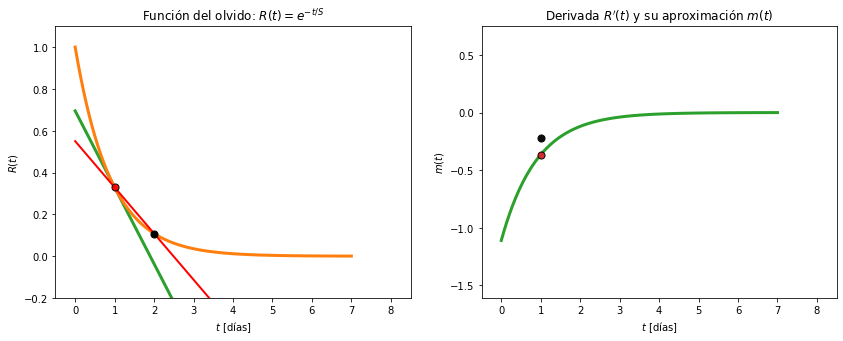

In [2]:
"""
@author: Luis M. de la Cruz [Updated on mié 18 ene 2023 14:07:31 CST].
"""

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#import macti.visual

R = lambda t, S: np.exp(-t/S) # Función del olvido
R_d = lambda t, S: -np.exp(-t/S) / S # Derivada de la función del olvido
mf = lambda t, h, S: (R(t + h, S) - R(t, S)) / h # Aproximación de la derivada de la función del olvido

def razonDeCambio(S, h, i0, anot):
    """
    Esta función muestra las gráficas de R(t), R'(t) y mf(t)
    
    Parameters
    ----------
    S: float
    Representa la intensidad del recuerdo en la función del olvido.
    
    h: float
    La separación entre los dos puntos para aproximar la derivada: (R(t+h) - R(t))/h.
    
    i0: int
    Índice para definir dónde se calcula la derivada: td[i0]
    
    """
    # Dominio para la evaluación de las funciones: 0,1,2,..., 7
    td = np.arange(0,8,1)
    
    # Arreglo para almacenar la aproximación de la derivada m(t) en td
    m = np.zeros(len(td)) 
    
    # Aproximación de la derivada en cada punto de td
    for i,t in enumerate(td):
        m[i] = mf(t, h, S)

    # Dominio para graficar R(t) y R'(t)
    t = np.linspace(0, 7, 100)

    # Inicialización de la figura y las subgráficas
    plt.figure(figsize=(14,5))
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    
    # Configuración de cada gráfica
    ax1.set_title('Función del olvido: $R(t) = e^{-t/S}$')
    ax1.set_xlabel('$t$ [días]')
    ax1.set_ylabel('$R(t)$')
    ax1.set_xlim(-0.5,8.5)
    ax1.set_ylim(-0.2, 1.1)
    
    ax2.set_title('Derivada $R^\prime(t)$ y su aproximación $m(t)$')
    ax2.set_xlabel('$t$ [días]')
    ax2.set_ylabel('$m(t)$')
    ax2.set_xlim(-0.5,8.5)
    ax2.set_ylim(R_d(0.0, S)-0.5, 0.75)
    
    # Cálculo de la recta tangente exacta en el punto td[i0]
    recta = R_d(td[i0],S)*(td-td[i0]) + R(td[i0], S) 

    # Cálculo de la recta aproximada en un punto.
    recta_m = m[i0]*(td-td[i0]) + R(td[i0], S)

    # Graficación de R(t), las rectas, y los puntos para la aproximación.
    ax1.plot(t, R(t, S), '-', c='C1', label='$R(t)$', lw=3)
    ax1.plot(td, recta, c = 'C2', lw = 3, label='Recta tangente', zorder=1)
    ax1.plot(td, recta_m, c = 'red', lw = 2, zorder=2, label='Aproximación')
    ax1.scatter(td[i0], R(td[i0], S), fc='red', ec = 'black', alpha = 0.95, s = 50, zorder = 5)    
    ax1.scatter(td[i0]+h, R(td[i0]+h, S), c = 'black', s = 50, zorder = 5)    

    # Graficación de la curva de la derivada exacta y 
    # del valor exacto de la derivada en un punto y de su aproximación.
    ax2.plot(t, R_d(t, S), lw = 3, c = 'C2', label='$R^\prime(t)$', zorder = 3, )
    ax2.scatter(td[i0], R_d(td[i0], S), fc='C3', ec = 'black', alpha = 0.95, s = 50, label='Valor exacto', zorder = 5)
    ax2.scatter(td[i0], m[i0], fc = 'black', ec = 'black', alpha = 0.95, s = 50, label='Aproximación', zorder = 5)

    # Textos para el gráfico
    texto1 = ' = {:12.10f}'.format(R(td[i0], S))
    texto2 = ' = {:12.10f}'.format(R(td[i0]+h, S))
    texto3 = ' = {:12.10f}'.format(m[i0])
    texto4 = ' = {:12.10f}'.format(R_d(td[i0], S))
    
    # Mostrar valores de las aproximaciones
    if anot:
        ax1.annotate(text = '$R(t)$' + texto1, xy = (td[i0], R(td[i0], S)), xycoords='data',
                     xytext = (0.5, 0.5), textcoords='axes fraction', color ='red', fontsize=16, 
                     arrowprops=dict(arrowstyle='->', color='red', shrinkA = 5, shrinkB = 5, 
                                     connectionstyle="angle3,angleA=0,angleB=90"))
        ax1.annotate(text = '$R(t+h)$' + texto2, xy = (td[i0]+h, R(td[i0]+h, S)), xycoords='data',
                     xytext = (0.5, 0.3), textcoords='axes fraction', color ='black', fontsize=16,
                     arrowprops=dict(arrowstyle='->', color='black', shrinkA = 5, shrinkB = 5, 
                                     connectionstyle="angle3,angleA=90,angleB=0"))         
        ax2.annotate(text = '$m($' + str(i0) + '$)$' + texto3, xy = (td[i0], m[i0]), xycoords='data',
                     xytext = (0.5, 0.5), textcoords='axes fraction', color='black', fontsize=16,
                     arrowprops=dict(arrowstyle='->', color='black', shrinkA = 5, shrinkB = 5, 
                                     connectionstyle="angle3,angleA=90,angleB=0"))    
        ax2.annotate(text = '$R^\prime($' + str(i0) + '$)$' + texto4, xy = (td[i0], R_d(td[i0], S)), xycoords='data',
                     xytext = (0.5, 0.4), textcoords='axes fraction', color='C3', fontsize=16,
                     arrowprops=dict(arrowstyle='->', color='C3', shrinkA = 5, shrinkB = 5, 
                                     connectionstyle="angle3,angleA=0,angleB=90"))
    
    # Configuración final de las gráficas.
    ax2.legend(ncol=3, frameon=True)
    ax1.legend(ncol=3, frameon=True)
    plt.tight_layout()
    plt.show()
    if anot:
        print("m({0:}) = {1:12.10f},  R'({0:}) = {2:12.10f}".format(i0, m[i0], R_d(td[i0], S)))
    
w = widgets.interact(razonDeCambio,
                     S = widgets.FloatSlider(min=0.3, max=1.0, step=0.2, value=0.9),
                     h = widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=1.0),
                     i0 = widgets.IntSlider(min=0, max=6, step=1, value=1, description='t'),
                     anot = widgets.Checkbox(value=False, description='Muestra valores', disabled=False,indent=False)
                    )
display(w)